In [45]:
import pandas as pd 
import matplotlib.pyplot as plt 
from tqdm import tqdm
from wordcloud import WordCloud
import nltk # Natural Language Toolkit
from nltk.corpus import stopwords
import re 
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score
from prettytable import PrettyTable
import random
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [46]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

## Import and visualize the data 

In [47]:
df = pd.read_csv('IMDB Dataset.csv')
df = df[:1000]

In [48]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [49]:
df['sentiment'].value_counts()

sentiment
positive    501
negative    499
Name: count, dtype: int64

In [50]:
positive_review = list(df[df['sentiment']=='positive']['review'])
negative_review = list(df[df['sentiment']=='negative']['review'])

In [51]:
positive_review

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [52]:
len(positive_review)

501

In [53]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Word cloud of reviews

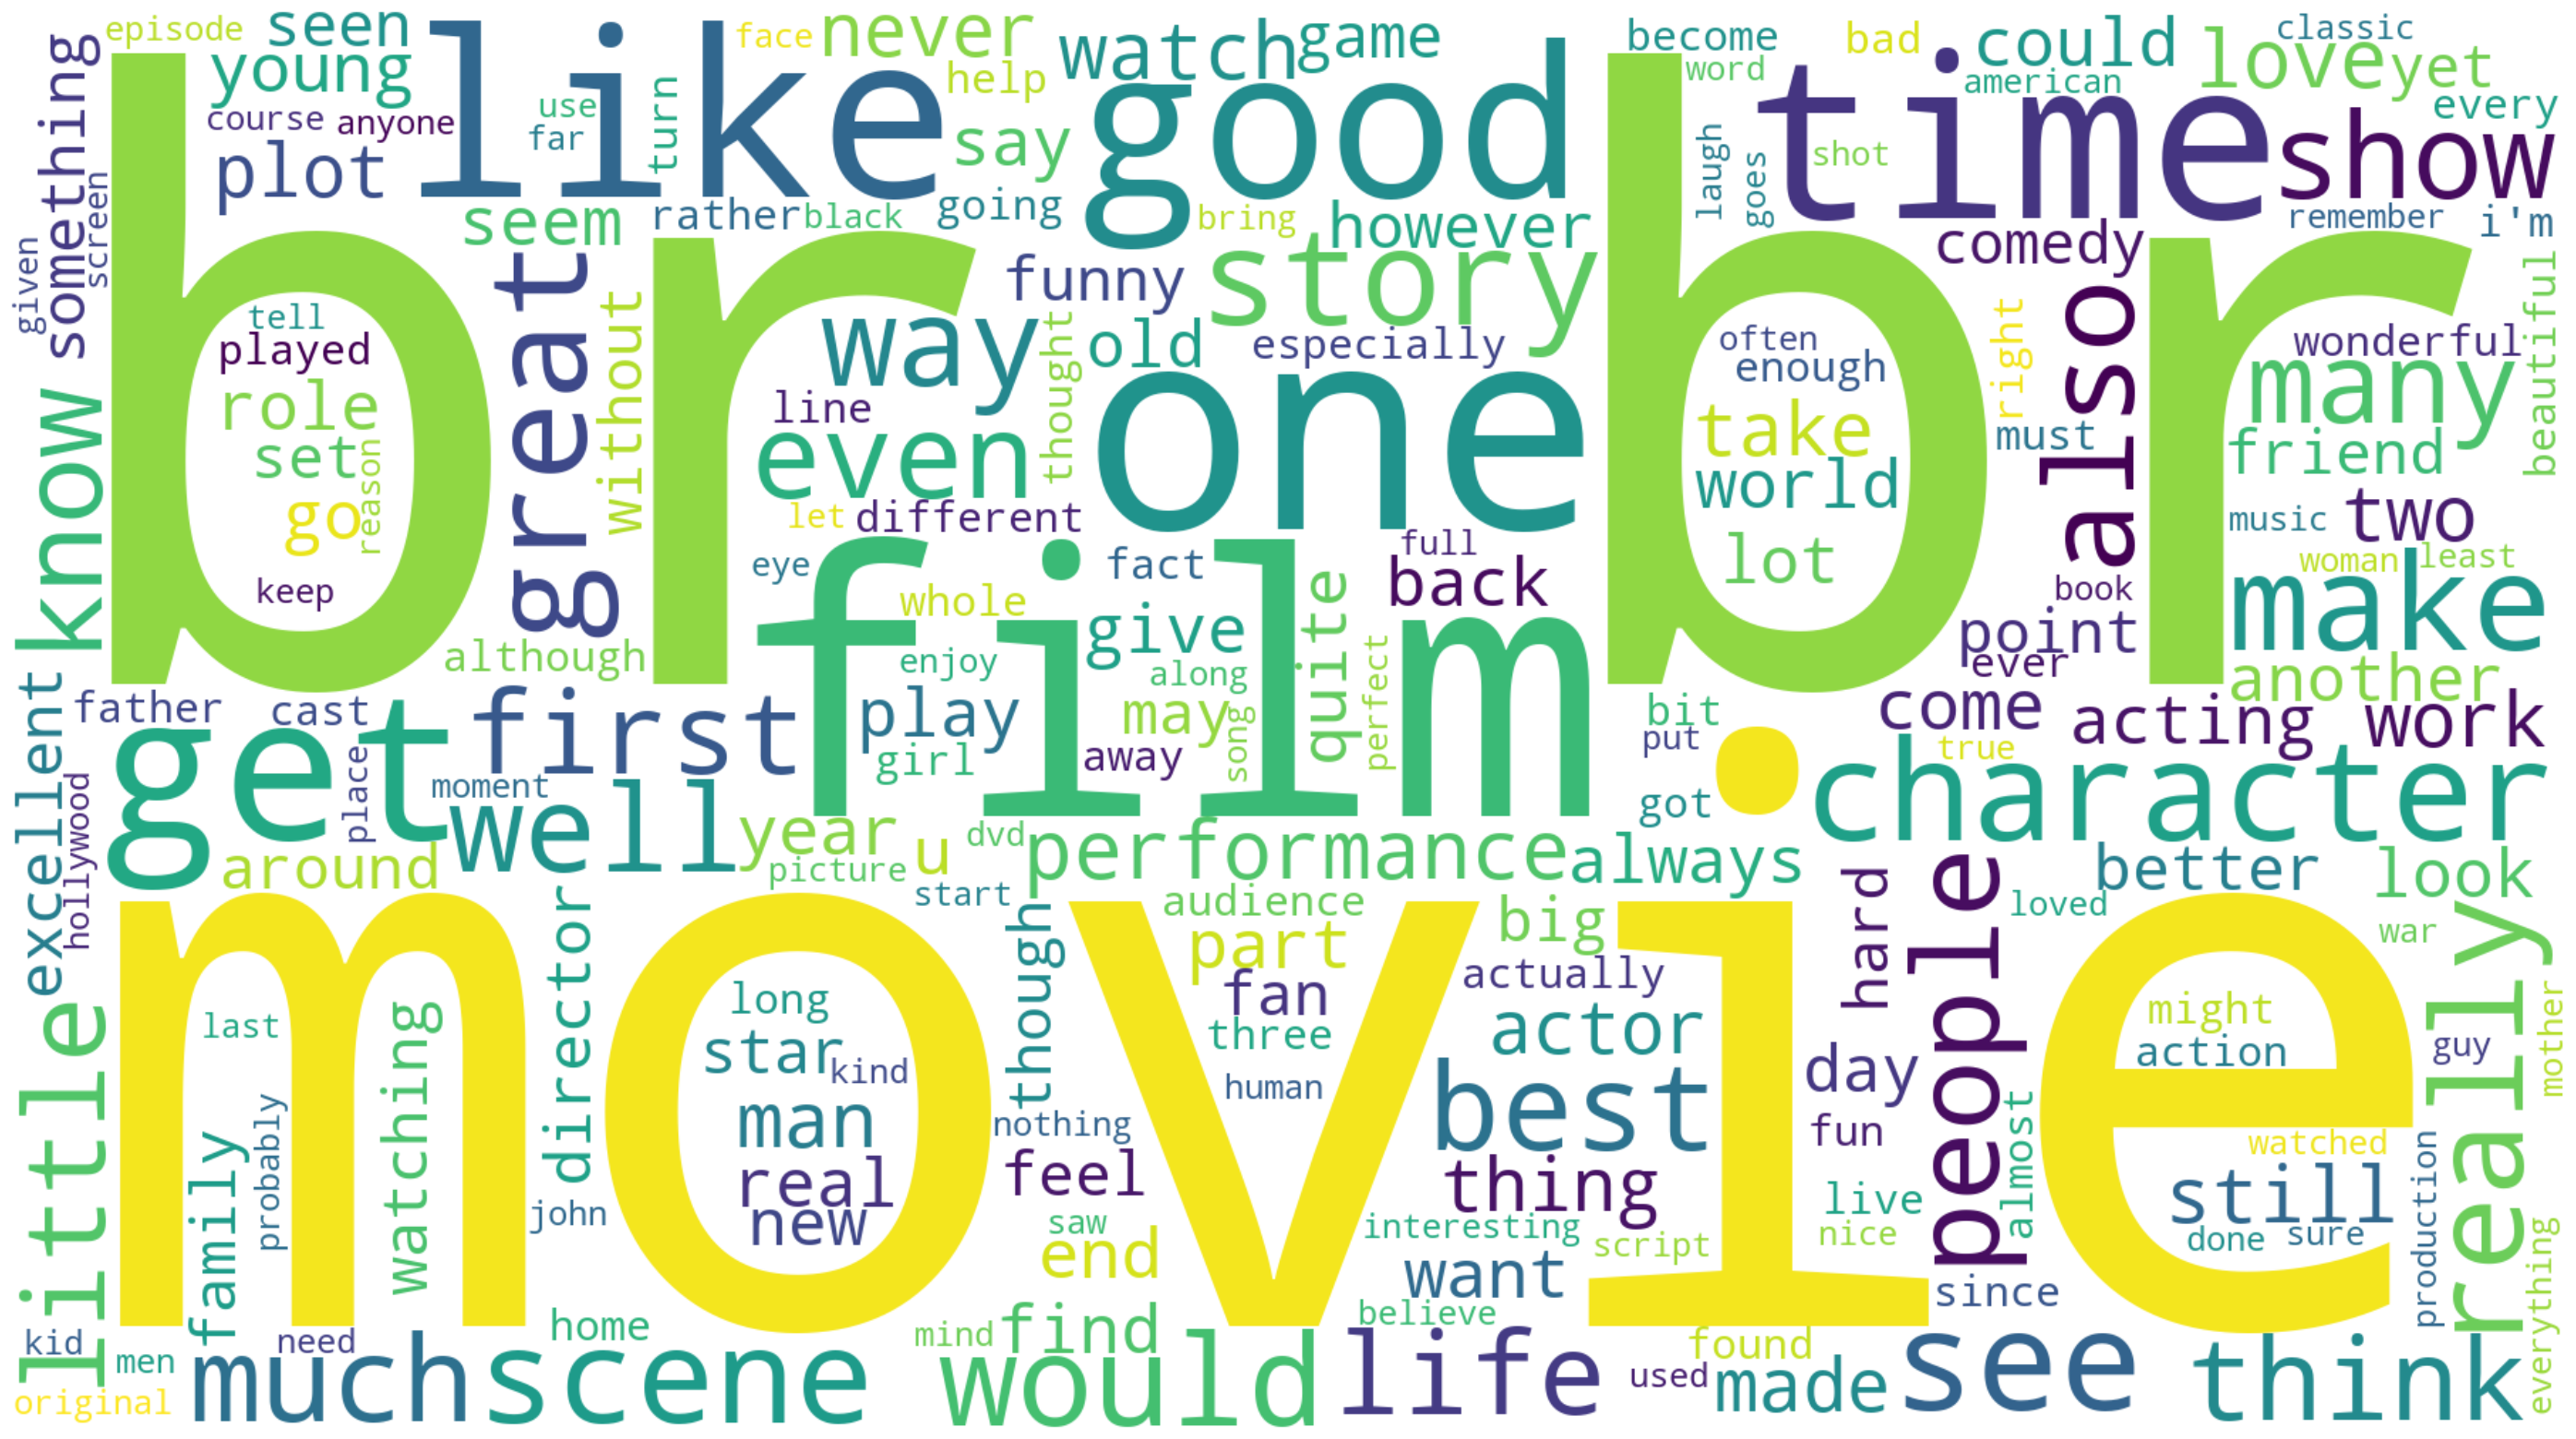

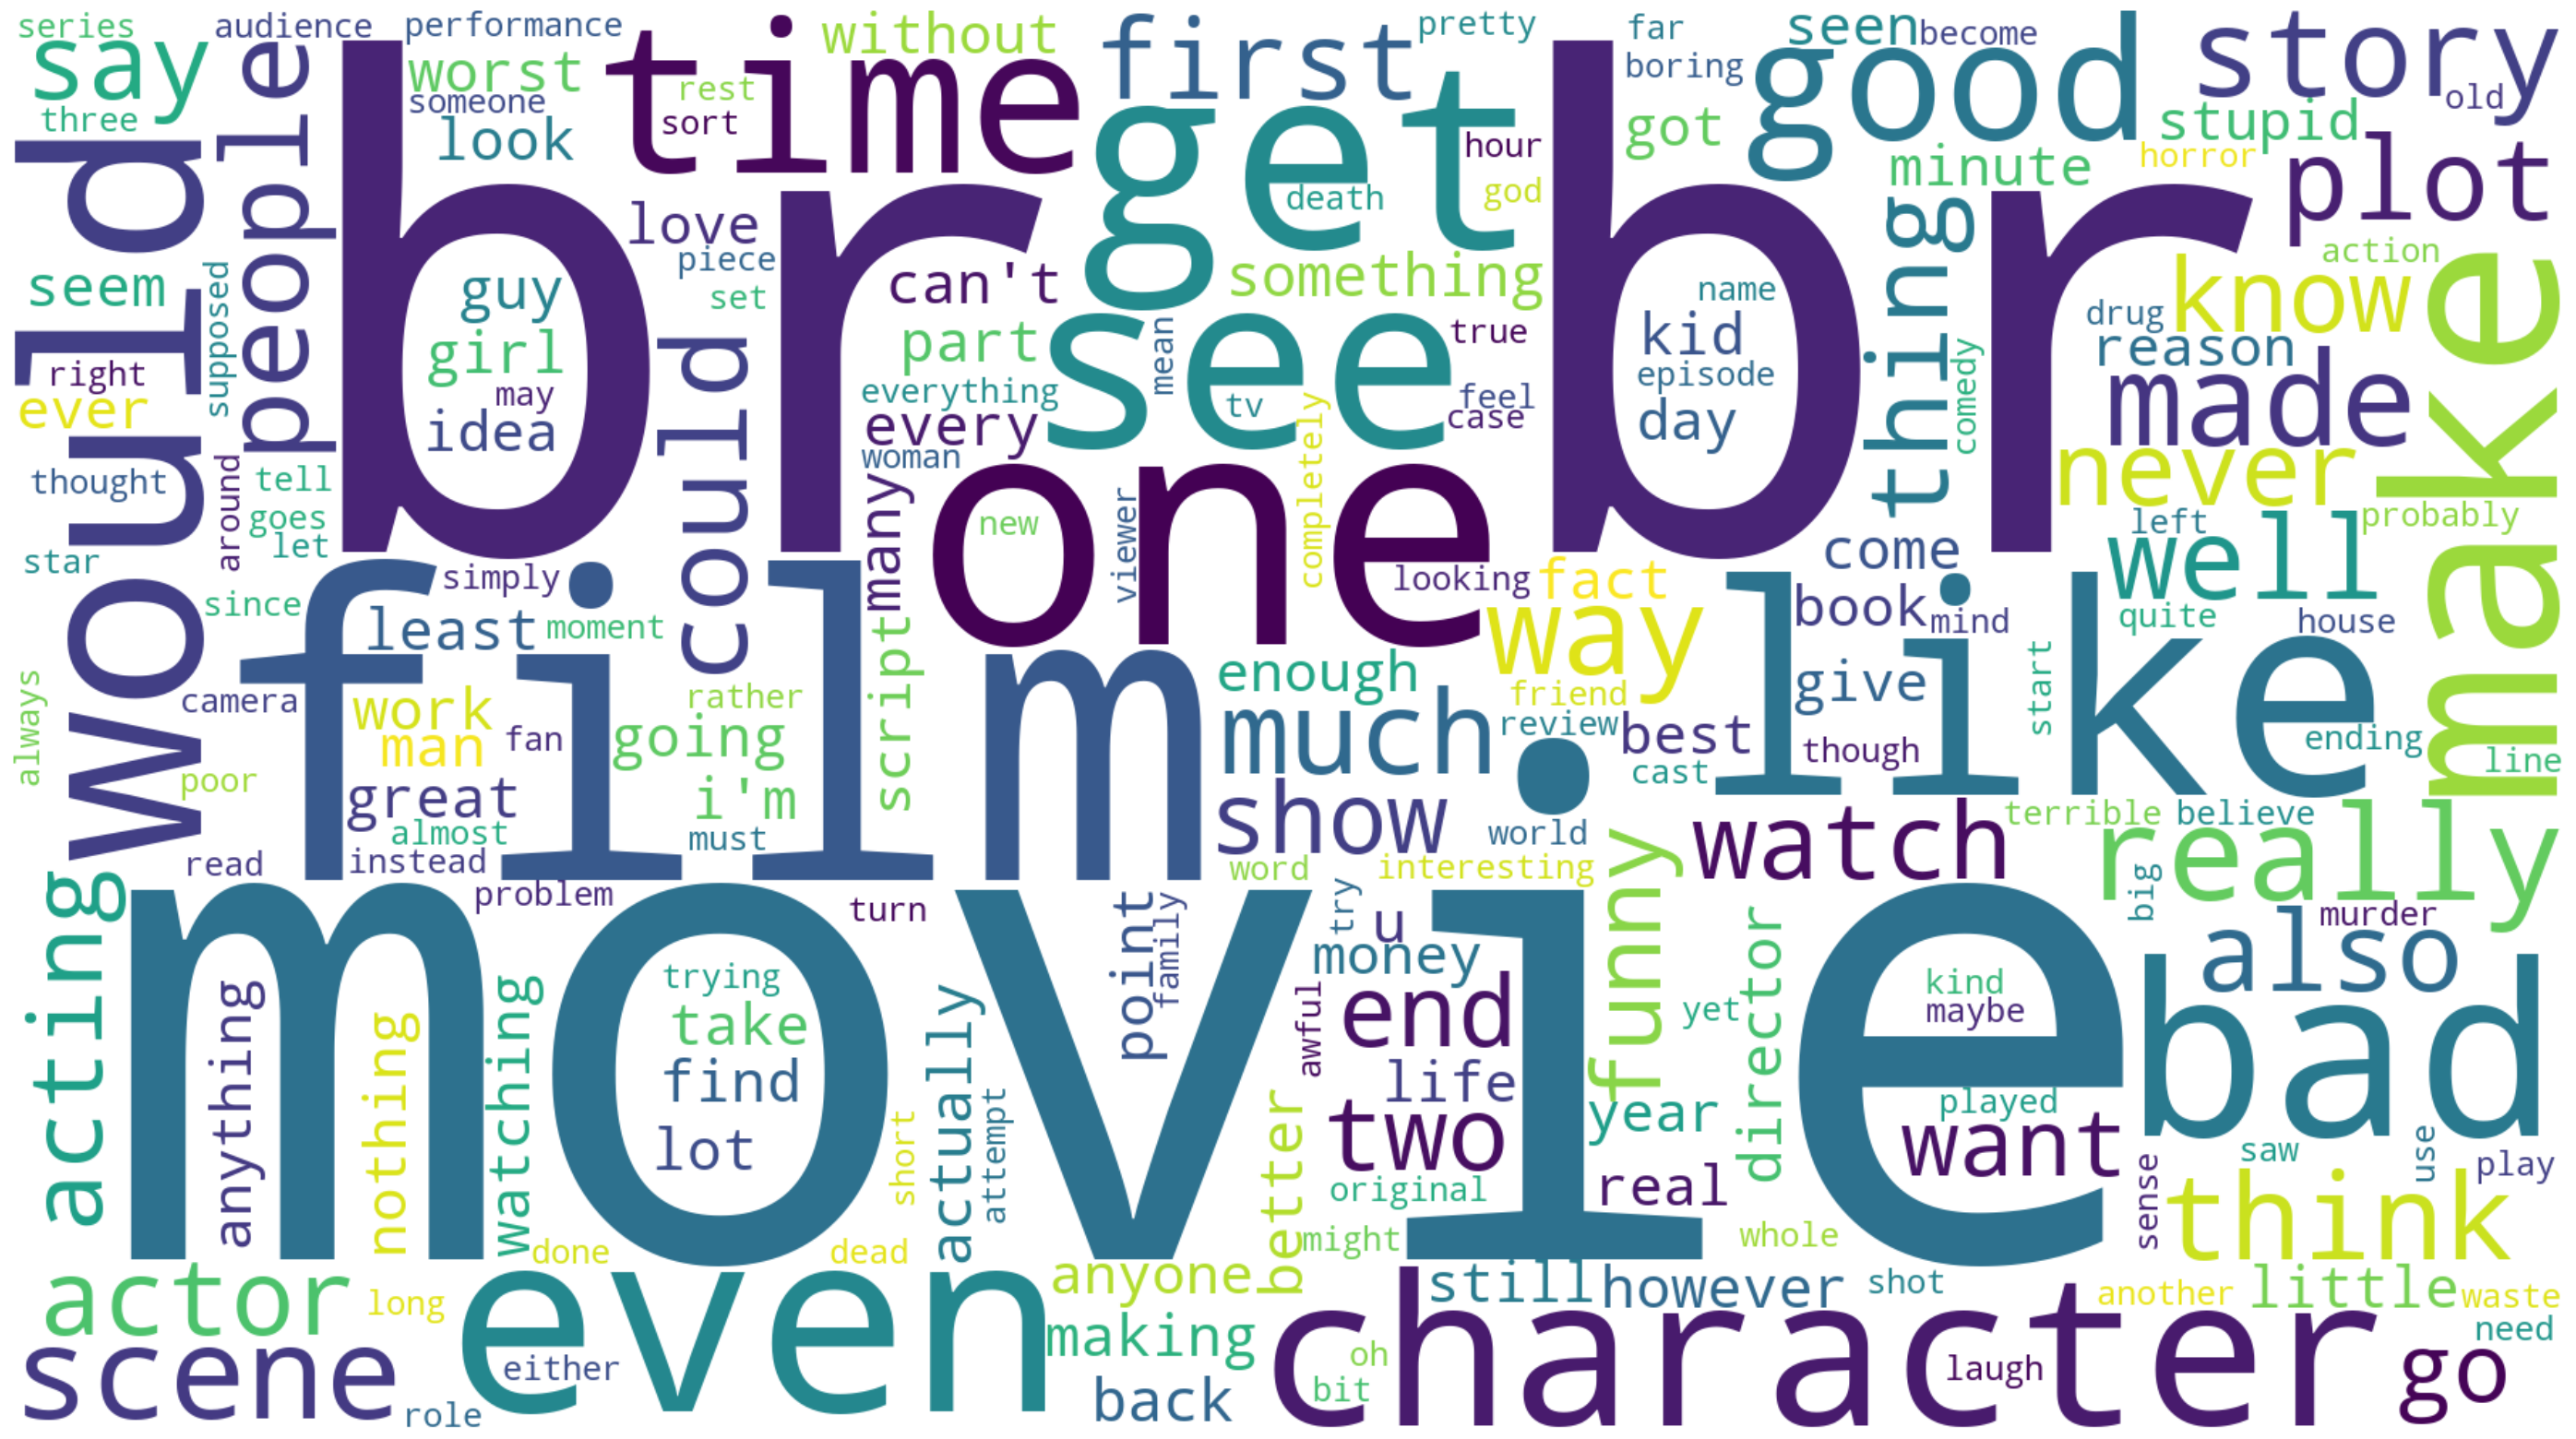

In [54]:
def wordCloud(review):
    text = ' '.join(word.lower() for word in review) # Join all reviews with space
    wordcloud = WordCloud(height=1000, width=1800, background_color='white', stopwords=stop_words).generate(text)

    plt.figure(figsize=(40,20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

wordCloud(positive_review)
wordCloud(negative_review)

## Data cleaning 

In [57]:
corpus = []

for i in tqdm(df['review'].values):
    review = re.sub('[^a-zA-Z]', " ", i)
    review = review.lower()
    review = review.split()
    stopword = stopwords.words('english')
    stopword.remove('not')
    word = ' '.join(PorterStemmer().stem(word) for word in review if word not in set(stopword))
    corpus.append(word)


corpus


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 191.51it/s]


['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust not show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci not high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc not violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that

## Feature Engineering 

In [58]:
df['cleaned_review']=corpus
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  
0  one review mention watch oz episod hook right ...  
1  wonder littl product br br film techniqu unass...  
2  thought wonder way spend time hot summer weeke...  
3  basic famili littl boy jake think zombi closet...  
4  petter mattei love time money visual stun film...

In [59]:
encoder = LabelEncoder()
df.iloc[:, 1]= encoder.fit_transform(df['sentiment'])
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...         1   
1  A wonderful little production. <br /><br />The...         1   
2  I thought this was a wonderful way to spend ti...         1   
3  Basically there's a family where a little boy ...         0   
4  Petter Mattei's "Love in the Time of Money" is...         1   

                                      cleaned_review  
0  one review mention watch oz episod hook right ...  
1  wonder littl product br br film techniqu unass...  
2  thought wonder way spend time hot summer weeke...  
3  basic famili littl boy jake think zombi closet...  
4  petter mattei love time money visual stun film...

##  Spliting the data 

In [60]:
x = df['cleaned_review']
y = df['sentiment']

x.shape, y.shape

((1000,), (1000,))

In [61]:
x_train , x_test , y_train , y_test = train_test_split(x, y ,test_size = 0.3 ,random_state=56)

In [62]:
x_train.shape, x_test.shape

((700,), (300,))

In [63]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [64]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

y_train.info(), y_test.info()

<class 'pandas.core.series.Series'>
Index: 700 entries, 838 to 853
Series name: sentiment
Non-Null Count  Dtype
--------------  -----
700 non-null    int32
dtypes: int32(1)
memory usage: 8.2 KB
<class 'pandas.core.series.Series'>
Index: 300 entries, 213 to 679
Series name: sentiment
Non-Null Count  Dtype
--------------  -----
300 non-null    int32
dtypes: int32(1)
memory usage: 3.5 KB


(None, None)

## KNN

In [65]:
x_train.shape, x_test.shape


((700, 10193), (300, 10193))

In [66]:
l = list(range(1, 100))
table = PrettyTable()
table.field_names=['K','Train f1','Test f1','Train Accuracy','Test Accuracy']

for i in tqdm(l):
    if i%2!=0:
        knn = KNeighborsClassifier(n_neighbors=i, p=2)
    
        knn.fit(x_train, y_train)
    
        y_pred_train = knn.predict(x_train)
        f1score = f1_score(y_pred_train, y_train)
        accuracy = accuracy_score(y_pred_train, y_train)
    
        y_pred_test = knn.predict(x_test)
        f1score_test = f1_score(y_pred_test, y_test)
        accuracy_test = accuracy_score(y_pred_test, y_test)
    
        table.add_row([i ,f1score,f1score_test,accuracy,accuracy_test])

table

  0%|                                                                                           | 0/99 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:06<00:00, 15.10it/s]


+----+--------------------+--------------------+--------------------+---------------------+
| K  |      Train f1      |      Test f1       |   Train Accuracy   |    Test Accuracy    |
+----+--------------------+--------------------+--------------------+---------------------+
| 1  |        1.0         | 0.5508196721311477 |        1.0         |  0.5433333333333333 |
| 3  | 0.8288043478260869 | 0.5952380952380952 |        0.82        |  0.5466666666666666 |
| 5  | 0.7706185567010309 | 0.5705705705705706 | 0.7457142857142857 |  0.5233333333333333 |
| 7  | 0.7279596977329975 | 0.5672514619883042 | 0.6914285714285714 |  0.5066666666666667 |
| 9  | 0.711276332094176  | 0.5755813953488372 | 0.6671428571428571 |  0.5133333333333333 |
| 11 | 0.7050183598531212 | 0.5932203389830508 | 0.6557142857142857 |         0.52        |
| 13 | 0.6908212560386473 | 0.5898876404494381 | 0.6342857142857142 |  0.5133333333333333 |
| 15 | 0.6699029126213593 | 0.576271186440678  | 0.6114285714285714 |         0.5         |
| 17 | 0.6523297491039427 | 0.5714285714285714 | 0.5842857142857143 |         0.49        |
| 19 | 0.6506024096385543 | 0.5888888888888889 | 0.5857142857142857 |  0.5066666666666667 |
| 21 | 0.6483909415971394 | 0.5761772853185595 | 0.5785714285714286 |         0.49        |
| 23 | 0.6483909415971394 | 0.5745856353591161 | 0.5785714285714286 |  0.4866666666666667 |
| 25 | 0.6443914081145584 | 0.5745856353591161 | 0.5742857142857143 |  0.4866666666666667 |
| 27 | 0.6410564225690276 | 0.5849582172701949 | 0.5728571428571428 |  0.5033333333333333 |
| 29 | 0.6404761904761905 | 0.5793871866295265 | 0.5685714285714286 | 0.49666666666666665 |
| 31 | 0.6388557806912991 | 0.5849582172701949 | 0.5671428571428572 |  0.5033333333333333 |
| 33 | 0.6388557806912991 | 0.5810055865921787 | 0.5671428571428572 |         0.5         |
| 35 | 0.6354916067146283 | 0.5730337078651685 | 0.5657142857142857 | 0.49333333333333335 |
| 37 | 0.630695443645084  | 0.5690140845070423 |        0.56        |         0.49        |
| 39 | 0.6324582338902149 | 0.5714285714285714 |        0.56        |         0.49        |
| 41 | 0.6374407582938388 | 0.5682451253481894 | 0.5628571428571428 | 0.48333333333333334 |
| 43 | 0.6335697399527187 | 0.5722222222222223 | 0.5571428571428572 |  0.4866666666666667 |
| 45 | 0.6358244365361804 | 0.5698324022346369 | 0.5614285714285714 |  0.4866666666666667 |
| 47 | 0.6390532544378699 | 0.5682451253481894 | 0.5642857142857143 | 0.48333333333333334 |
| 49 | 0.6414201183431952 | 0.5682451253481894 | 0.5671428571428572 | 0.48333333333333334 |
| 51 | 0.6382978723404256 | 0.5682451253481894 | 0.5628571428571428 | 0.48333333333333334 |
| 53 | 0.6360424028268551 | 0.569060773480663  | 0.5585714285714286 |         0.48        |
| 55 | 0.6336866902237926 | 0.5674931129476584 | 0.5557142857142857 |  0.4766666666666667 |
| 57 | 0.6298472385428907 | 0.569060773480663  |        0.55        |         0.48        |
| 59 | 0.6344339622641509 | 0.5714285714285714 | 0.5571428571428572 |         0.48        |
| 61 | 0.6345475910693302 | 0.5753424657534247 | 0.5557142857142857 | 0.48333333333333334 |
| 63 | 0.6338028169014085 | 0.5753424657534247 | 0.5542857142857143 | 0.48333333333333334 |
| 65 | 0.629976580796253  | 0.5769230769230769 | 0.5485714285714286 |  0.4866666666666667 |
| 67 | 0.6313309776207303 | 0.5769230769230769 | 0.5528571428571428 |  0.4866666666666667 |
| 69 | 0.6269005847953216 | 0.5785123966942148 | 0.5442857142857143 |         0.49        |
| 71 | 0.6324387397899651 | 0.5769230769230769 |        0.55        |  0.4866666666666667 |
| 73 | 0.6339181286549708 | 0.5785123966942148 | 0.5528571428571428 |         0.49        |
| 75 | 0.6339181286549708 | 0.5753424657534247 | 0.5528571428571428 | 0.48333333333333334 |
| 77 | 0.639344262295082  | 0.5808219178082192 |        0.56        |         0.49        |
| 79 | 0.641860465116279  | 0.5808219178082192 |        0.56        |         0.49        |
| 81 | 0.6425233644859814 | 0.58241758241758

In [67]:
knn = KNeighborsClassifier(n_neighbors=41 ,p=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

target_names = ['Positive','negative']
print(classification_report(y_pred, y_test, target_names=target_names))
print(classification_report(y_pred_train, y_train, target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.29      0.46      0.36        93
    negative       0.67      0.49      0.57       207

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.46       300
weighted avg       0.55      0.48      0.50       300

              precision    recall  f1-score   support

    Positive       0.36      0.61      0.45       205
    negative       0.77      0.54      0.64       495

    accuracy                           0.56       700
   macro avg       0.56      0.58      0.54       700
weighted avg       0.65      0.56      0.58       700



In [68]:
metrics = confusion_matrix(y_pred , y_test)
metrics

array([[ 43,  50],
       [105, 102]], dtype=int64)

## RandomForest

In [69]:
l = list(range(1, 100))
table = PrettyTable()
table.field_names=['n_estimators','Train f1','Test f1','Train Accuracy','Test Accuracy']

for i in tqdm(l):

    random = RandomForestClassifier(n_estimators=i, random_state = 43)

    random.fit(x_train, y_train)

    y_pred_train = random.predict(x_train)
    f1score = f1_score(y_pred_train, y_train)
    accuracy = accuracy_score(y_pred_train, y_train)

    y_pred_test = random.predict(x_test)
    f1score_test = f1_score(y_pred_test, y_test)
    accuracy_test = accuracy_score(y_pred_test, y_test)

    table.add_row([i ,f1score,f1score_test,accuracy,accuracy_test])

table

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [02:30<00:00,  1.52s/it]


+--------------+--------------------+--------------------+--------------------+--------------------+
| n_estimators |      Train f1      |      Test f1       |   Train Accuracy   |   Test Accuracy    |
+--------------+--------------------+--------------------+--------------------+--------------------+
|      1       | 0.8412017167381973 | 0.5714285714285715 | 0.8414285714285714 |        0.58        |
|      2       | 0.8145695364238411 | 0.5042735042735043 |        0.84        | 0.6133333333333333 |
|      3       | 0.9363507779349364 | 0.6644067796610169 | 0.9357142857142857 |        0.67        |
|      4       | 0.9258698940998487 | 0.5679012345679013 |        0.93        |        0.65        |
|      5       | 0.9713467048710601 | 0.6643835616438356 | 0.9714285714285714 | 0.6733333333333333 |
|      6       | 0.9676470588235295 | 0.5984251968503937 | 0.9685714285714285 |        0.66        |
|      7       | 0.9743589743589743 |        0.68        | 0.9742857142857143 |        0.68        |
|      8       | 0.9812409812409812 | 0.6468401486988848 | 0.9814285714285714 | 0.6833333333333333 |
|      9       | 0.988538681948424  | 0.6821192052980133 | 0.9885714285714285 |        0.68        |
|      10      | 0.9884393063583815 | 0.6446886446886447 | 0.9885714285714285 | 0.6766666666666666 |
|      11      | 0.9957081545064378 | 0.6689655172413793 | 0.9957142857142857 |        0.68        |
|      12      |  0.99568345323741  | 0.6397058823529411 | 0.9957142857142857 | 0.6733333333333333 |
|      13      | 0.9985693848354792 | 0.6643835616438356 | 0.9985714285714286 | 0.6733333333333333 |
|      14      | 0.9985693848354792 | 0.6498194945848375 | 0.9985714285714286 | 0.6766666666666666 |
|      15      | 0.9985693848354792 | 0.6847457627118644 | 0.9985714285714286 |        0.69        |
|      16      | 0.9985693848354792 | 0.6881720430107526 | 0.9985714285714286 |        0.71        |
|      17      | 0.9985693848354792 | 0.7114093959731543 | 0.9985714285714286 | 0.7133333333333334 |
|      18      |        1.0         | 0.704626334519573  |        1.0         | 0.7233333333333334 |
|      19      |        1.0         | 0.7171052631578947 |        1.0         | 0.7133333333333334 |
|      20      |        1.0         | 0.6996466431095406 |        1.0         | 0.7166666666666667 |
|      21      |        1.0         | 0.7254901960784312 |        1.0         |        0.72        |
|      22      |        1.0         |  0.71280276816609  |        1.0         | 0.7233333333333334 |
|      23      |        1.0         | 0.7313915857605178 |        1.0         | 0.7233333333333334 |
|      24      |        1.0         | 0.7342657342657343 |        1.0         | 0.7466666666666667 |
|      25      |        1.0         | 0.7385620915032679 |        1.0         | 0.7333333333333333 |
|      26      |        1.0         | 0.7397260273972601 |        1.0         | 0.7466666666666667 |
|      27      |        1.0         | 0.7524752475247526 |        1.0         |        0.75        |
|      28      |        1.0         | 0.7464788732394365 |        1.0         |        0.76        |
|      29      |        1.0         | 0.7609427609427609 |        1.0         | 0.7633333333333333 |
|      30      |        1.0         | 0.7386759581881533 |        1.0         |        0.75        |
|      31      |        1.0         | 0.7533333333333334 |        1.0         | 0.7533333333333333 |
|      32      |        1.0         | 0.7457627118644069 |        1.0         |        0.75        |
|      33      |        1.0         | 0.7565789473684209 |        1.0         | 0.7533333333333333 |
|      34      |        1.0         | 0.7432432432432431 |        1.0         | 0.7466666666666667 |
|      35      |        1.0         | 0.7533333333333334 |        1.0         | 0.7533333333333333 |
|      36      |        1.0         | 0.7440273037542662 |        1.0         |        0.75        |
|      37      |        1.0         | 0.7483443708609273 |   

In [70]:
random = RandomForestClassifier(n_estimators=95, random_state=43)
random.fit(x_train,y_train)
y_pred = random.predict(x_test)
y_pred_train = random.predict(x_train)

target_names = ['Positive','negative']
print(classification_report(y_pred,y_test,target_names=target_names))
print(classification_report(y_pred_train, y_train, target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.84      0.78      0.81       159
    negative       0.77      0.83      0.80       141

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300

              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00       351
    negative       1.00      1.00      1.00       349

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [71]:
metrics = confusion_matrix(y_pred , y_test)
metrics

array([[124,  35],
       [ 24, 117]], dtype=int64)

## Decision Tree Classifier 

In [72]:
l = list(range(1, 60))
table = PrettyTable()
table.field_names=['random_state', 'Train f1', 'Test f1', 'Train Accuracy', 'Test Accuracy']

for i in tqdm(l):

    random = RandomForestClassifier(random_state = i)

    random.fit(x_train, y_train)

    y_pred_train = random.predict(x_train)
    f1score = f1_score(y_pred_train, y_train)
    accuracy = accuracy_score(y_pred_train, y_train)

    y_pred_test = random.predict(x_test)
    f1score_test = f1_score(y_pred_test, y_test)
    accuracy_test = accuracy_score(y_pred_test, y_test)

    table.add_row([i ,f1score,f1score_test,accuracy,accuracy_test])
    
table

  0%|                                                                                           | 0/59 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [02:29<00:00,  2.54s/it]


+--------------+----------+--------------------+----------------+--------------------+
| random_state | Train f1 |      Test f1       | Train Accuracy |   Test Accuracy    |
+--------------+----------+--------------------+----------------+--------------------+
|      1       |   1.0    | 0.7920792079207921 |      1.0       |        0.79        |
|      2       |   1.0    | 0.8066666666666666 |      1.0       | 0.8066666666666666 |
|      3       |   1.0    | 0.7934426229508197 |      1.0       |        0.79        |
|      4       |   1.0    | 0.7785234899328859 |      1.0       |        0.78        |
|      5       |   1.0    | 0.7724137931034482 |      1.0       |        0.78        |
|      6       |   1.0    | 0.7999999999999999 |      1.0       | 0.8033333333333333 |
|      7       |   1.0    | 0.7602739726027398 |      1.0       | 0.7666666666666667 |
|      8       |   1.0    | 0.759322033898305  |      1.0       | 0.7633333333333333 |
|      9       |   1.0    | 0.771331058020478  |      1.0       | 0.7766666666666666 |
|      10      |   1.0    | 0.7781569965870306 |      1.0       | 0.7833333333333333 |
|      11      |   1.0    | 0.8040540540540541 |      1.0       | 0.8066666666666666 |
|      12      |   1.0    | 0.7811447811447813 |      1.0       | 0.7833333333333333 |
|      13      |   1.0    | 0.7892976588628763 |      1.0       |        0.79        |
|      14      |   1.0    | 0.785234899328859  |      1.0       | 0.7866666666666666 |
|      15      |   1.0    | 0.7864406779661016 |      1.0       |        0.79        |
|      16      |   1.0    | 0.7645051194539251 |      1.0       |        0.77        |
|      17      |   1.0    | 0.8067796610169493 |      1.0       |        0.81        |
|      18      |   1.0    | 0.8041958041958042 |      1.0       | 0.8133333333333334 |
|      19      |   1.0    | 0.734982332155477  |      1.0       |        0.75        |
|      20      |   1.0    | 0.7864406779661016 |      1.0       |        0.79        |
|      21      |   1.0    | 0.777027027027027  |      1.0       |        0.78        |
|      22      |   1.0    | 0.7708333333333333 |      1.0       |        0.78        |
|      23      |   1.0    | 0.7676767676767676 |      1.0       |        0.77        |
|      24      |   1.0    | 0.7947882736156352 |      1.0       |        0.79        |
|      25      |   1.0    | 0.754325259515571  |      1.0       | 0.7633333333333333 |
|      26      |   1.0    | 0.7876712328767124 |      1.0       | 0.7933333333333333 |
|      27      |   1.0    | 0.7933333333333334 |      1.0       | 0.7933333333333333 |
|      28      |   1.0    | 0.7811447811447813 |      1.0       | 0.7833333333333333 |
|      29      |   1.0    | 0.7837837837837838 |      1.0       | 0.7866666666666666 |
|      30      |   1.0    | 0.7755102040816326 |      1.0       |        0.78        |
|      31      |   1.0    | 0.7972508591065293 |      1.0       | 0.8033333333333333 |
|      32      |   1.0    | 0.7622377622377623 |      1.0       | 0.7733333333333333 |
|      33      |   1.0    | 0.7666666666666666 |      1.0       | 0.7666666666666667 |
|      34      |   1.0    | 0.7817589576547231 |      1.0       | 0.7766666666666666 |
|      35      |   1.0    | 0.777027027027027  |      1.0       |        0.78        |
|      36      |   1.0    | 0.782006920415225  |      1.0       |        0.79        |
|      37      |   1.0    | 0.7808219178082193 |      1.0       | 0.7866666666666666 |
|      38      |   1.0    | 0.7880794701986754 |      1.0       | 0.7866666666666666 |
|      39      |   1.0    | 0.7739726027397261 |      1.0       |        0.78        |
|      40      |   1.0    | 0.7702702702702704 |      1.0       | 0.7733333333333333 |
|      41      |   1.0    | 0.7808219178082193 |      1.0       | 0.7866666666666666 |
|      42      |   1.0    | 0.7918088737201365 |      1.0       | 0.7966666666666666 |
|      43      |   1.0    | 0.7808219178082193 |      1.0       | 0.7866666666666666 

In [73]:
tree = DecisionTreeClassifier(random_state = 17)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
y_pred_train = tree.predict(x_train)

target_names = ['Positive','negative']
print(classification_report(y_pred,y_test,target_names=target_names))
print(classification_report(y_pred_train, y_train, target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.74      0.66      0.70       166
    negative       0.63      0.72      0.67       134

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300

              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00       351
    negative       1.00      1.00      1.00       349

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [74]:
metrics = confusion_matrix(y_pred , y_test)
metrics

array([[110,  56],
       [ 38,  96]], dtype=int64)

## Naive Bayes model

In [75]:
x_train  = x_train.toarray()
x_test = x_test.toarray()

In [76]:
naive = GaussianNB()
naive.fit(x_train, y_train)
y_pred = naive.predict(x_test)

y_pred_train = naive.predict(x_train)

target_names = ['Positive','negative']
print(classification_report(y_pred,y_test,target_names=target_names))
print(classification_report(y_pred_train, y_train, target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.70      0.58      0.63       179
    negative       0.50      0.63      0.56       121

    accuracy                           0.60       300
   macro avg       0.60      0.60      0.59       300
weighted avg       0.62      0.60      0.60       300

              precision    recall  f1-score   support

    Positive       1.00      0.98      0.99       359
    negative       0.98      1.00      0.99       341

    accuracy                           0.99       700
   macro avg       0.99      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700



In [77]:
metrics = confusion_matrix(y_pred , y_test)
metrics

array([[103,  76],
       [ 45,  76]], dtype=int64)